# Visualize experimental results.

In [1]:
# Imports.
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Results to work with.
results_file = './results/test.json'


# Load results.
with open(results_file, 'r') as f:
    results = json.load(f)
    
    
# Drop the first and last data points, if desired.
drop_first = 0
drop_last = 1  # Should always drop last given interrupt.

for key in results:
    results[key] = results[key][drop_first:len(results[key])-drop_last]

In [3]:
# Count return values.
print(Counter(results['complete_success']))

Counter({0: 29, 1: 1})


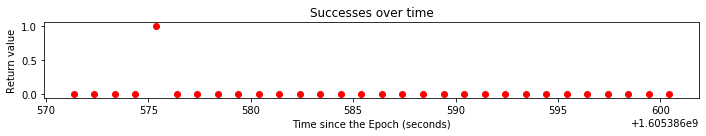

In [4]:
# Plot successes over time.
plt.figure(figsize=(10,2))
plt.plot(results['timestamp'], results['complete_success'], 'ro')
plt.title('Successes over time')
plt.xlabel('Time since the Epoch (seconds)')
plt.ylabel('Return value')
plt.tight_layout()

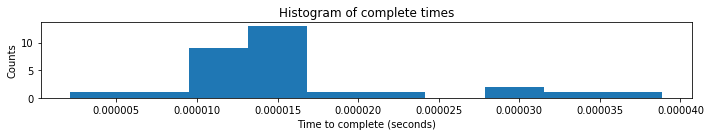

In [5]:
# Plot histogram of complete times.
plt.figure(figsize=(10,2))
plt.hist(results['complete_time'], bins=10, density=False)
plt.title('Histogram of complete times')
plt.xlabel('Time to complete (seconds)')
plt.ylabel('Counts')
plt.tight_layout()

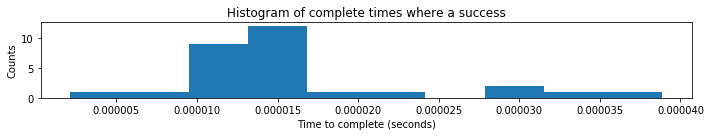

In [6]:
# Plot histogram of complete times where a success.
plt.figure(figsize=(10,2))
plt.hist([e for i,e in enumerate(results['complete_time']) if results['complete_success'][i]==0], bins=10, density=False)
plt.title('Histogram of complete times where a success')
plt.xlabel('Time to complete (seconds)')
plt.ylabel('Counts')
plt.tight_layout()